In [1]:
from main_simple_lib import *

2024-01-31 22:55:27.970134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 22:55:28.130076: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-31 22:55:28.713840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-31 22:55:28.713932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda116.so
CUDA SETUP: CUDA runtime path found: /data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 116
CUDA SETUP: Loading binary /data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda116.so...


/data/mn27889/miniconda3/envs/vipergpt/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so'), PosixPath('/data/mn27889/miniconda3/envs/vipergpt/lib/libcudart.so.11.0')}.. We'll flip a coin and try one of these, in order to fail forward.
Either way, this might cause trouble in the future:
If you get `CUDA error: invalid device function` errors, the above might be the cause and the solution is to make sure only one ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] in the paths that we search based on your env.
  warn(msg)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

### Testing the raw data

In [2]:
# import pandas as pd
# test_data = pd.read_csv('plip_test_data/test_data.csv')
# test_data.head()

In [3]:
# image_path = ["plip_test_data/" + image_name for image_name in test_data['image_name'].tolist()]
# images_list = [load_image(path) for path in image_path]
# prompts_list = test_data['caption'].tolist()

In [4]:
# img_idx=0
# text_idx=0
# image = images_list[img_idx]
# prompt = prompts_list[text_idx]

In [5]:
# query = 'Where are dilated and congested?'
# query = 'Are the sinuses dilated and congested?'
# query = 'Is there increased fibrosis in the red pulp, capsule and the trabeculae?'
# query = 'Where is the increased fibrosis?'
# query = 'Is gamma-gandy body also seen?'
# query = 'What is slightly depressed on the surface?'
# query = 'Where is the wedge-shaped infarct slightly depressed?'
# query = 'Is the wedge-shaped infarct slightly depressed on the surface?'
# query = 'What is on the surface?'
# query = 'What is pale while the margin is haremorrhagic?'

### Testing the PathVQA dataset

In [6]:
import pickle
img_train_path = "/data/mn27889/pvqa/images/train/"
qas_train_path = "/data/mn27889/pvqa/qas/train/train_qa.pkl"
with open(qas_train_path, 'rb') as file:
    pvqa_qas = pickle.load(file)

In [7]:
qas_yes_no = [qas for qas in pvqa_qas if qas['answer'] == 'yes' or qas['answer'] == 'no']
ques_yes_no = [qas['question'] for qas in qas_yes_no]
ans_yes_no = [qas['answer'] for qas in qas_yes_no]
img_yes_no_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_yes_no]

In [8]:
qas_general = [qas for qas in pvqa_qas if qas['answer'] != 'yes' and qas['answer'] != 'no']
ques_general = [qas['question'] for qas in qas_general]
ans_general = [qas['answer'] for qas in qas_general]
img_general_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_general]

In [9]:
idx = 2
query = ques_yes_no[idx]
query_ans = ans_yes_no[idx]
query_img = load_image(img_yes_no_path[idx])
print(query)
print(query_ans)

Does preserved show dissolution of the tissue?

no

In [10]:
# idx = 2
# query = ques_general[idx]
# query_ans = ans_general[idx]
# query_img = load_image(img_general_path[idx])
# print(query)
# print(query_ans)

In [13]:
code = get_code(query)

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     preserved_patches = image_patch.find_plip("preserved")                                                     
  3     preserved_patch = best_image_match_plip(preserved_patches, "preserved")                                    
  4     return bool_to_yesno(preserved_patch.verify_property_plip("preserved", "dissolution"))                     

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

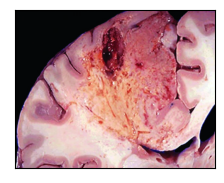

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

preserved_patches[0] =

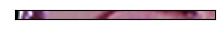

preserved_patches[1] =

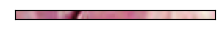

preserved_patches[2] =

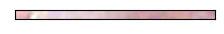

preserved_patches[3] =

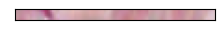

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

preserved_patch =

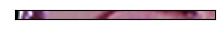

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

bool_to_yesno(preserved_patch.verify_property_plip('preserved', 'dissolution')) = yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = yes

In [14]:
ans = execute_code(code, query_img, show_intermediate_steps=True)